# Problem Statement:
Problem Statement: 

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. 
The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount,
Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.(Classification)

2.)Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

3.)If customer is not eligible for the input required amount and duration:
   a.)what can be amount for the given duration.(Regression)
  
   b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration?
      What is that duration?(Regression)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Importing training Data

In [2]:
df=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Loan_project/training_set (1).csv')
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# Looking for missing values

In [4]:
df.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing value treatment

Divide data features according to their datatypes, categorical and numerical

In [5]:
cat=[]
con=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [6]:
cat.remove('Loan_ID')

In [7]:
for i in cat:
        c=df[i].mode()[0]
        df[i]=df[i].fillna(c)  #-----> For catrgorical missisng values we will replace it with mode value of that feature       

        
for i in con:
        c=df[i].mean()
        df[i]=df[i].fillna(c)     #---->for numerical missing values we will replace it with mean value of that feature

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Dropping Un-necessary features

In [9]:
df1=df.drop(['Loan_ID'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


# 1.)Check eligibility of the Customer given the inputs described above.(Classification)

Here we are classifying the loan eligibility.In our data feature called 'Loan_Status' ,which have YES and NO values means customer is eligible or not.

we will do exploratory data analysis with respect to Loan_Status.

Bivariate analysis

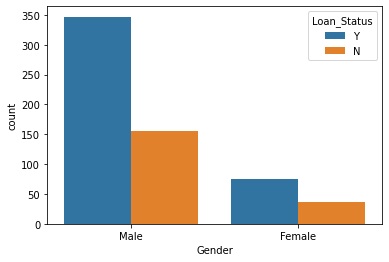

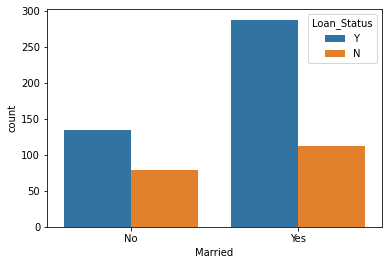

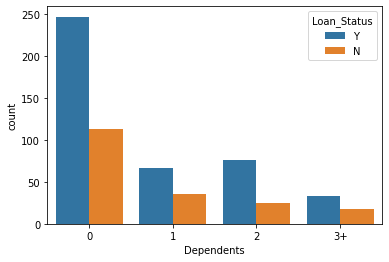

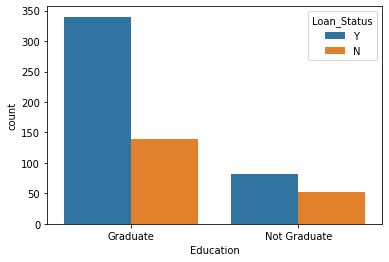

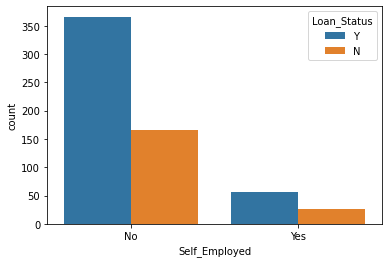

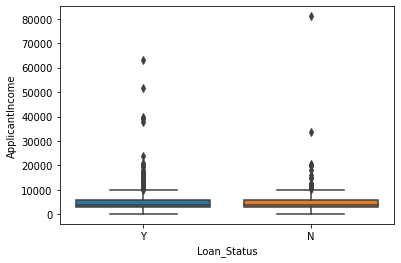

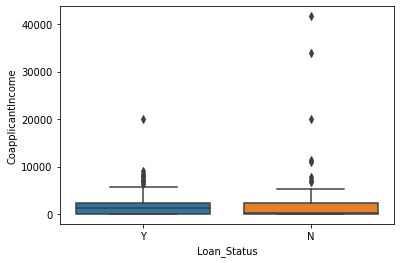

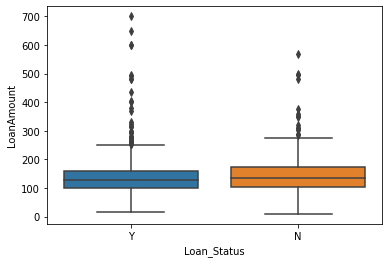

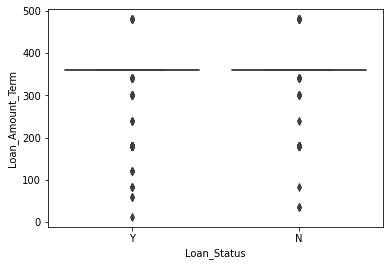

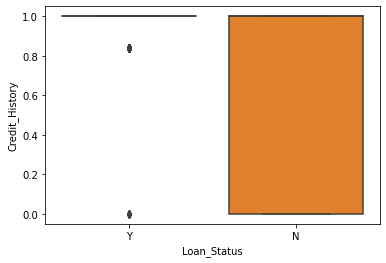

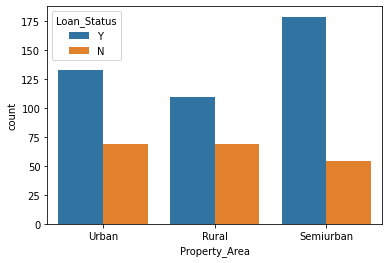

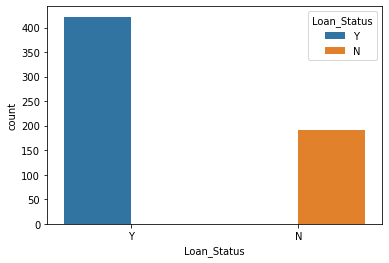

In [10]:
for i in df1.columns:
    if(df1[i].dtypes=='object'):
        sb.countplot(df1[i],hue=df1['Loan_Status'])
        plt.show()
    else:
        sb.boxplot(df1['Loan_Status'],df1[i])
        plt.show()

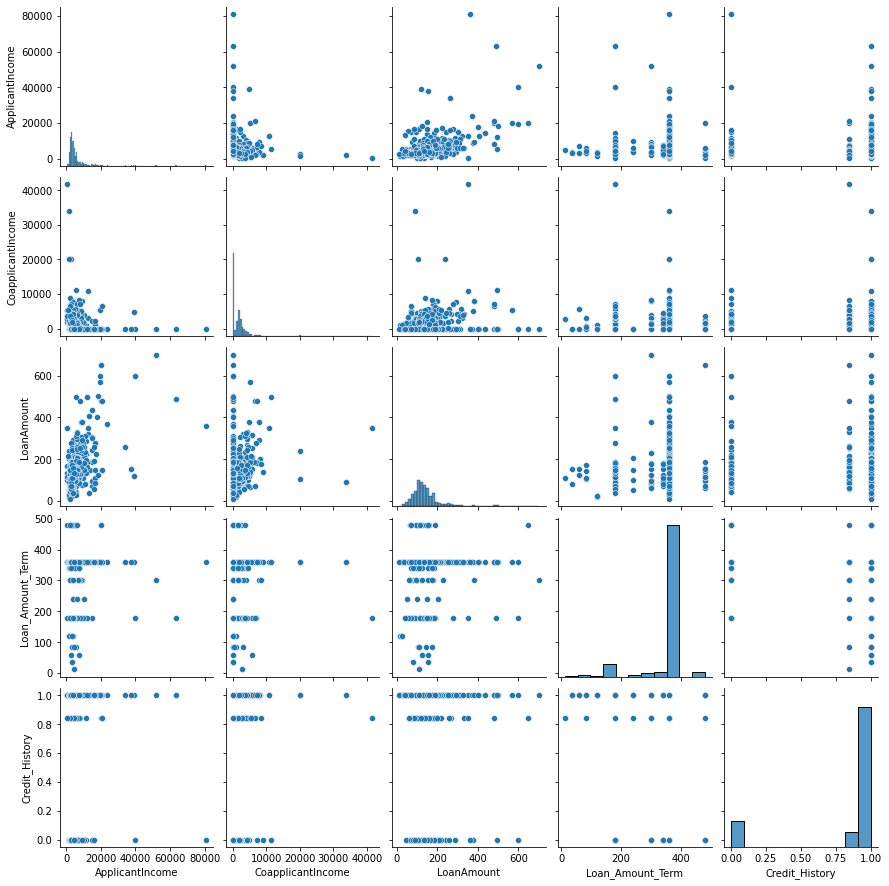

In [11]:
sb.pairplot(df1)

The data here is skewed and non linear

# Skewness in data

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

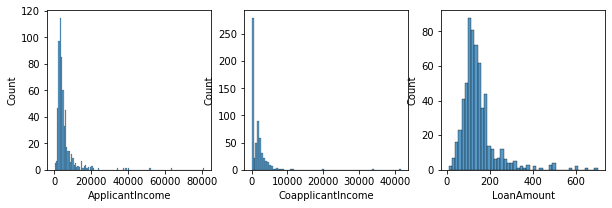

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sb.histplot(df1['ApplicantIncome'])
plt.subplot(3,3,2)
sb.histplot(df1['CoapplicantIncome'])
plt.subplot(3,3,3)
sb.histplot(df1['LoanAmount'])

It shows features are suffering from Negative skewness in data . Negative Skewness is where Mean < Median. skewness can be trated with log function.

In [13]:
df1.skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [14]:

def skew_rem(df,col):
    q = []
    for i in df[col]:
        if(i != 0):
            q.append(np.log(i))
        else:
            q.append(i)
    df[col] = q

In [15]:
skew_rem(df1,'CoapplicantIncome')
skew_rem(df1,'ApplicantIncome')            

#Feature selected with skew >3

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

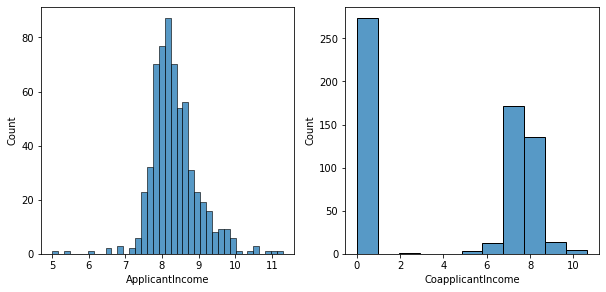

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sb.histplot(df1['ApplicantIncome'])
plt.subplot(2,2,2)
sb.histplot(df1['CoapplicantIncome'])

# Feature selection Using Anova and ChiSquare test

In [17]:
def ANOVA(df,cat,con):
    import pandas as pd
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [18]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    import pandas as pd
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return b

In [19]:
from preprocessing_6PM import ANOVA,chisquare
imp_cols = []
for i in con:
    q = ANOVA(df1,"Loan_Status",i)
    print("-------------")
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

-------------
Loan_Status vs ApplicantIncome
Pval:  0.795
-------------
Loan_Status vs CoapplicantIncome
Pval:  0.134
-------------
Loan_Status vs LoanAmount
Pval:  0.368
-------------
Loan_Status vs Loan_Amount_Term
Pval:  0.604
-------------
Loan_Status vs Credit_History
Pval:  0.0


In [20]:
for i in cat:
    q = chisquare(df1,"Loan_Status",i)
    print("-------------")
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

-------------
Loan_Status vs Gender
Pval:  0.7391461310869638
-------------
Loan_Status vs Married
Pval:  0.029608580862582116
-------------
Loan_Status vs Dependents
Pval:  0.3688663081366005
-------------
Loan_Status vs Education
Pval:  0.04309962129357355
-------------
Loan_Status vs Self_Employed
Pval:  1.0
-------------
Loan_Status vs Property_Area
Pval:  0.0021360187811644915
-------------
Loan_Status vs Loan_Status
Pval:  1.544676456058992e-134


In [21]:
imp_cols

['CoapplicantIncome',
 'Credit_History',
 'Married',
 'Education',
 'Property_Area',
 'Loan_Status']

In [22]:
imp_cols2=['CoapplicantIncome','Credit_History','Married_No', 'Married_Yes','Education_Graduate','Education_Not Graduate','Property_Area_Rural', 'Property_Area_Semiurban','Property_Area_Urban']
imp_cols2

['CoapplicantIncome',
 'Credit_History',
 'Married_No',
 'Married_Yes',
 'Education_Graduate',
 'Education_Not Graduate',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

# Standardisation of Data

For categorical features we will use OHE(One Hot Encoding

In [23]:
df1.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.00000,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.595180,7.31854,128.000000,360.0,1.0,Rural,N


In [24]:
cat.remove('Loan_Status')

In [25]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [26]:
dfcat=pd.get_dummies(df1[cat])
dfcat.head(2)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


For Numerical or continuos features we will use StandardScalar Standardisation

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dfcon=pd.DataFrame(ss.fit_transform(df1[con]),columns=con)

In [28]:
dfcon.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.515465,-1.107731,0.000000,0.279851,0.45164
1,0.393196,0.782215,-0.219273,0.279851,0.45164


joining cat and con dataframes

In [29]:
X1=pd.concat([dfcon,dfcat],axis=1)
X1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.515465,-1.107731,0.000000,0.279851,0.45164,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.393196,0.782215,-0.219273,0.279851,0.45164,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.519896,-1.107731,-0.957641,0.279851,0.45164,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.751980,0.897656,-0.314547,0.279851,0.45164,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.554992,-1.107731,-0.064454,0.279851,0.45164,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [30]:
X2=X1[imp_cols2]
X2.head()       #this is for linear model with imp- features

,CoapplicantIncome,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.107731,0.45164,1,0,1,0,0,0,1
1,0.782215,0.45164,0,1,1,0,1,0,0
2,-1.107731,0.45164,0,1,1,0,0,0,1
3,0.897656,0.45164,0,1,0,1,0,0,1
4,-1.107731,0.45164,1,0,1,0,0,0,1


Here we are classifying eligibility for loan ,so the target variable will be 'Loan_Status'.

In [31]:
Y=df1[['Loan_Status']]

# Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X2,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lomodel = lo.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,confusion_matrix
pred_tr = lomodel.predict(xtrain)
pred_ts = lomodel.predict(xtest)
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [33]:
tr_acc

0.8044806517311609

In [34]:
ts_acc

0.8130081300813008

In [35]:
def model_builder(mod):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score,confusion_matrix
    xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
    model = mod.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr_acc1=round(tr_acc,3)
    ts_acc1=round(ts_acc,3)
    return tr_acc1,ts_acc1,confusion_matrix(ytest,pred_ts)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=21,max_depth=3)
model_builder(dtc)

(0.815,
 0.821,
 array([[19, 19],
        [ 3, 82]], dtype=int64))

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=21,max_depth=2)
model_builder(rf)

(0.807,
 0.821,
 array([[19, 19],
        [ 3, 82]], dtype=int64))

In [38]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(dtc)
model_builder(adb)

(1.0,
 0.74,
 array([[22, 16],
        [16, 69]], dtype=int64))

# Regularization 

In [39]:
for i in range(1,40,1):
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    print("Results for max depth: %d"%i)
    print(model_builder(dtc))

Results for max depth: 1
(0.807, 0.821, array([[19, 19],
       [ 3, 82]], dtype=int64))
Results for max depth: 2
(0.815, 0.821, array([[19, 19],
       [ 3, 82]], dtype=int64))
Results for max depth: 3
(0.815, 0.821, array([[19, 19],
       [ 3, 82]], dtype=int64))
Results for max depth: 4
(0.827, 0.789, array([[20, 18],
       [ 8, 77]], dtype=int64))
Results for max depth: 5
(0.837, 0.805, array([[18, 20],
       [ 4, 81]], dtype=int64))
Results for max depth: 6
(0.855, 0.789, array([[18, 20],
       [ 6, 79]], dtype=int64))
Results for max depth: 7
(0.874, 0.78, array([[20, 18],
       [ 9, 76]], dtype=int64))
Results for max depth: 8
(0.89, 0.772, array([[19, 19],
       [ 9, 76]], dtype=int64))
Results for max depth: 9
(0.9, 0.764, array([[19, 19],
       [10, 75]], dtype=int64))
Results for max depth: 10
(0.923, 0.764, array([[20, 18],
       [11, 74]], dtype=int64))
Results for max depth: 11
(0.939, 0.715, array([[21, 17],
       [18, 67]], dtype=int64))
Results for max depth: 

In [40]:
for i in range(1,40,1):
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    print("Results for min_samples_leaf: %d"%i)
    print(model_builder(dtc))

Results for min_samples_leaf: 1
(1.0, 0.691, array([[23, 15],
       [23, 62]], dtype=int64))
Results for min_samples_leaf: 2
(0.947, 0.675, array([[22, 16],
       [24, 61]], dtype=int64))
Results for min_samples_leaf: 3
(0.914, 0.691, array([[22, 16],
       [22, 63]], dtype=int64))
Results for min_samples_leaf: 4
(0.886, 0.699, array([[23, 15],
       [22, 63]], dtype=int64))
Results for min_samples_leaf: 5
(0.876, 0.74, array([[21, 17],
       [15, 70]], dtype=int64))
Results for min_samples_leaf: 6
(0.857, 0.683, array([[20, 18],
       [21, 64]], dtype=int64))
Results for min_samples_leaf: 7
(0.847, 0.715, array([[22, 16],
       [19, 66]], dtype=int64))
Results for min_samples_leaf: 8
(0.841, 0.715, array([[22, 16],
       [19, 66]], dtype=int64))
Results for min_samples_leaf: 9
(0.841, 0.724, array([[22, 16],
       [18, 67]], dtype=int64))
Results for min_samples_leaf: 10
(0.831, 0.756, array([[21, 17],
       [13, 72]], dtype=int64))
Results for min_samples_leaf: 11
(0.831, 0

In [41]:
for i in range(2,50):
    abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=i)
    print("Results for n_estimators: %d"%i)
    print(model_builder(abc))

Results for n_estimators: 2
(0.815, 0.821, array([[19, 19],
       [ 3, 82]], dtype=int64))
Results for n_estimators: 3
(0.815, 0.78, array([[20, 18],
       [ 9, 76]], dtype=int64))
Results for n_estimators: 4
(0.817, 0.772, array([[20, 18],
       [10, 75]], dtype=int64))
Results for n_estimators: 5
(0.819, 0.756, array([[20, 18],
       [12, 73]], dtype=int64))
Results for n_estimators: 6
(0.829, 0.715, array([[22, 16],
       [19, 66]], dtype=int64))
Results for n_estimators: 7
(0.827, 0.715, array([[22, 16],
       [19, 66]], dtype=int64))
Results for n_estimators: 8
(0.833, 0.724, array([[21, 17],
       [17, 68]], dtype=int64))
Results for n_estimators: 9
(0.843, 0.724, array([[22, 16],
       [18, 67]], dtype=int64))
Results for n_estimators: 10
(0.847, 0.724, array([[22, 16],
       [18, 67]], dtype=int64))
Results for n_estimators: 11
(0.853, 0.724, array([[22, 16],
       [18, 67]], dtype=int64))
Results for n_estimators: 12
(0.857, 0.74, array([[22, 16],
       [16, 69]], d

# ML Model for test data

we are getting good results with LogisticRegression coz its binary classification . we will work on test data with Logistic.

In [246]:
dft=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Loan_project/testing_set (1).csv')
dft.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
dft1=dft.drop(['Loan_ID'],axis=1)

In [ ]:
dft1

In [44]:
for i in cat:
        c=dft1[i].mode()[0]
        dft1[i]=dft1[i].fillna(c)  #-----> For catrgorical missisng values we will replace it with mode value of that feature       

        
for i in con:
        c=dft1[i].mean()
        dft1[i]=dft1[i].fillna(c)     #---->for numerical missing values we will replace it with mean value of that feature

In [45]:
dft1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [46]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [47]:
m=pd.get_dummies(dft1[cat])
m.head(2)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [48]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [49]:
n=pd.DataFrame(ss.fit_transform(dft1[con]),columns=con)
n.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.186461,-0.673335,-0.429368,0.270603,0.47918
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918


In [50]:
r=pd.concat([n,m],axis=1)
r.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [51]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    float64
 1   CoapplicantIncome        367 non-null    float64
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Female            367 non-null    uint8  
 6   Gender_Male              367 non-null    uint8  
 7   Married_No               367 non-null    uint8  
 8   Married_Yes              367 non-null    uint8  
 9   Dependents_0             367 non-null    uint8  
 10  Dependents_1             367 non-null    uint8  
 11  Dependents_2             367 non-null    uint8  
 12  Dependents_3+            367 non-null    uint8  
 13  Education_Graduate       367 non-null    uint8  
 14  Education_Not Graduate   3

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=21,max_depth=3)
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
model = dtc.fit(xtrain,ytrain)

# Getting prediction on test data

In [53]:
dft1['Loan_Status_pred']=model.predict(r)

In [54]:
dft1['Loan_Status_pred'].value_counts()

Y    296
N     71
Name: Loan_Status_pred, dtype: int64

In [248]:
dft1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# 2.)Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

In [55]:
o=pd.DataFrame([r.columns,rf.feature_importances_]).T
o.columns=['Features','imp']

In [56]:
o.sort_values(by='imp',ascending=False)

,Features,imp
4,Credit_History,0.390415
1,CoapplicantIncome,0.101395
2,LoanAmount,0.076509
0,ApplicantIncome,0.070994
18,Property_Area_Semiurban,0.056648
7,Married_No,0.052799
14,Education_Not Graduate,0.051577
3,Loan_Amount_Term,0.044185
13,Education_Graduate,0.03506
8,Married_Yes,0.033461


# 2.)Identify customer segments from given data and categorize customer into one of the segments.(Clustering)


Selecting top3 important features for segmentation from rf(Random Forest) model which calculates feature importance

In [57]:
P=df[["Credit_History","LoanAmount","CoapplicantIncome"]]

In [58]:
P

,Credit_History,LoanAmount,CoapplicantIncome
0,1.0,146.412162,0.0
1,1.0,128.000000,1508.0
2,1.0,66.000000,0.0
3,1.0,120.000000,2358.0
4,1.0,141.000000,0.0
...,...,...,...
609,1.0,71.000000,0.0
610,1.0,40.000000,0.0
611,1.0,253.000000,240.0
612,1.0,187.000000,0.0


In [59]:
C=pd.DataFrame(ss.fit_transform(P),columns=P.columns)
#standardized features

In [60]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
model = km.fit(C)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [61]:
P['Cluster'] = model.labels_

In [62]:
P

,Credit_History,LoanAmount,CoapplicantIncome,Cluster
0,1.0,146.412162,0.0,0
1,1.0,128.000000,1508.0,0
2,1.0,66.000000,0.0,0
3,1.0,120.000000,2358.0,0
4,1.0,141.000000,0.0,0
...,...,...,...,...
609,1.0,71.000000,0.0,0
610,1.0,40.000000,0.0,0
611,1.0,253.000000,240.0,0
612,1.0,187.000000,0.0,0


In [63]:
C

,Credit_History,LoanAmount,CoapplicantIncome
0,0.451640,0.000000,-0.554368
1,0.451640,-0.219273,-0.038610
2,0.451640,-0.957641,-0.554368
3,0.451640,-0.314547,0.252103
4,0.451640,-0.064454,-0.554368
...,...,...,...
609,0.451640,-0.898095,-0.554368
610,0.451640,-1.267279,-0.554368
611,0.451640,1.269371,-0.472284
612,0.451640,0.483367,-0.554368


In [64]:
P.Credit_History.value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [65]:
q = []
for i in P.Credit_History:
    if(i < 0.5):
        q.append(0)
    else:
        q.append(1)

In [66]:
P.Credit_History = q

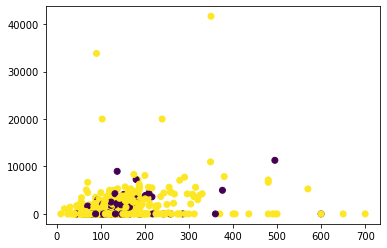

In [67]:
plt.scatter(P['LoanAmount'],P['CoapplicantIncome'],c=q)

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
w = le.fit_transform(df1['Loan_Status'])

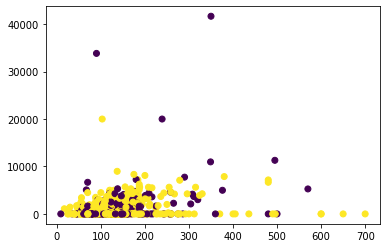

In [69]:
plt.scatter(P.LoanAmount,P.CoapplicantIncome,c=w)

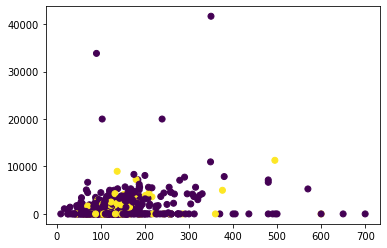

In [70]:
plt.scatter(P.LoanAmount,P.CoapplicantIncome,c=P.Cluster)

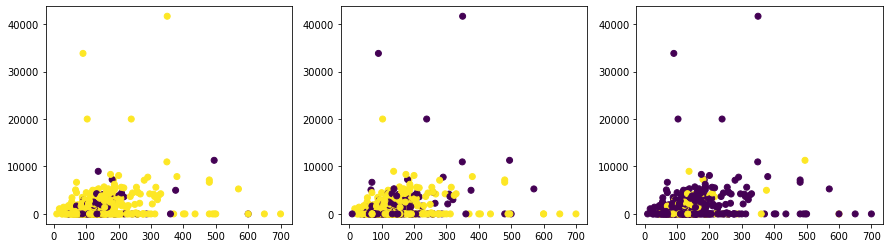

In [71]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(P.LoanAmount,P.CoapplicantIncome,c=q)
plt.subplot(1,3,2)
plt.scatter(P.LoanAmount,P.CoapplicantIncome,c=w)
plt.subplot(1,3,3)
plt.scatter(P.LoanAmount,P.CoapplicantIncome,c=P.Cluster)

# 3.)If customer is not eligible for the input required amount and duration:
   a.)what can be amount for the given duration.(Regression)
  

In [72]:
a=df1[df1.Loan_Status == "Y"].reset_index()
a.head(2)    
#from train data

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,8.674026,0.0,146.412162,360.0,1.0,Urban,Y
1,2,Male,Yes,0,Graduate,Yes,8.006368,0.0,66.000000,360.0,1.0,Urban,Y


In [73]:
dft1.rename(columns={"Loan_Status_pred": "Loan_Status"},inplace=True)

#test data

In [74]:
b=dft1[dft1.Loan_Status == "Y"].reset_index()
b.head(2)

#test data

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y


In [75]:
A=pd.concat([a,b])    #combine train test data

In [76]:
A.drop(['index'],axis=1,inplace=True)

In [77]:
A.index=range(0,718)

In [241]:
A.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,146.412162,360.0,1,Urban,Y
1,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.000000,360.0,1,Urban,Y
2,Male,Yes,0,Not Graduate,No,7.856707,7.765569,120.000000,360.0,1,Urban,Y
3,Male,No,0,Graduate,No,8.699515,0.000000,141.000000,360.0,1,Urban,Y
4,Male,Yes,2,Graduate,Yes,8.597297,8.341887,267.000000,360.0,1,Urban,Y


# Missing Data treatment

In [79]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [80]:
for i in cat:
        c=A[i].mode()[0]
        A[i]=A[i].fillna(c)  #-----> For catrgorical missisng values we will replace it with mode value of that feature       

        
for i in con:
        c=A[i].mean()
        A[i]=A[i].fillna(c)     #---->for numerical missing values we will replace it with mean value of that feature

In [81]:
A.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
A.Credit_History.value_counts()

1.000000    647
0.842199     37
0.825444     27
0.000000      7
Name: Credit_History, dtype: int64

In [83]:
q = []
for i in A.Credit_History:
    if(i < 0.5):
        q.append(0)
    else:
        q.append(1)

In [84]:
A.Credit_History = q

In [85]:
A.Credit_History.value_counts()

1    711
0      7
Name: Credit_History, dtype: int64

In [86]:
A.corr()[['LoanAmount']]

,LoanAmount
ApplicantIncome,0.186911
CoapplicantIncome,0.040225
LoanAmount,1.000000
Loan_Amount_Term,0.059433
Credit_History,-0.086221


In [87]:
for i in A.columns:
    if(A[i].dtypes == "object"):
        print("------------------------")
        print("Loan AMt vs",i)
        print(ANOVA(A,i,"LoanAmount"))

------------------------
Loan AMt vs Gender
0.004
------------------------
Loan AMt vs Married
0.0
------------------------
Loan AMt vs Dependents
0.0
------------------------
Loan AMt vs Education
0.0
------------------------
Loan AMt vs Self_Employed
0.0
------------------------
Loan AMt vs Property_Area
0.766
------------------------
Loan AMt vs Loan_Status
nan


In [88]:
A2=A.drop(['Credit_History','Loan_Status','LoanAmount'],axis=1)

In [89]:
A2.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area
0,Male,No,0,Graduate,No,8.674026,0.0,360.0,Urban
1,Male,Yes,0,Graduate,Yes,8.006368,0.0,360.0,Urban


In [90]:
Y=A['LoanAmount']

In [91]:
f=pd.get_dummies(A2[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])
f.head(2)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


In [92]:
g=pd.DataFrame(ss.fit_transform(A2[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']]),columns=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'])
g.head(2)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term
0,-0.489456,-0.476959,0.298449
1,-0.489617,-0.476959,0.298449


In [93]:
h=pd.concat([g,f],axis=1)
h.head(2)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.489456,-0.476959,0.298449,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.489617,-0.476959,0.298449,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


In [94]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(h,Y,test_size=0.2,random_state=21)

In [95]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lrmodel = lm.fit(xtrain,ytrain)

In [96]:
from sklearn.metrics import mean_absolute_error
pred_tr=lrmodel.predict(xtrain)
pred_ts=lrmodel.predict(xtest)

tr_err=mean_absolute_error(ytrain,pred_tr)
ts_err=mean_absolute_error(ytest,pred_ts)

In [97]:
tr_err

45.163552638591895

In [98]:
ts_err

46.468037257259425

# Regularisation

In [99]:
W = []
x = 1
for i in range(0,100,1):
    W.append(round(x+0.5,2))
    x = x+0.5 

In [100]:
from sklearn.linear_model import Ridge
rr=Ridge()
tg ={"alpha":[170]}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tg,scoring="neg_mean_squared_error",cv=4)

cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_
c = cvmodel.best_params_['alpha']
rr = Ridge(alpha=c)
ridgemodel = rr.fit(xtrain,ytrain)
pred_tr=ridgemodel.predict(xtrain)
pred_ts=ridgemodel.predict(xtest)

In [101]:
c

170

In [102]:
pred_tr=ridgemodel.predict(xtrain)
trr=round(mean_absolute_error(ytrain,pred_tr),2)
print('training error',trr)

pred_ts=ridgemodel.predict(xtest)
trs=round(mean_absolute_error(ytest,pred_ts),2)
print('testing error',trs)

print('Diff',trs-trr)

training error 44.86
testing error 44.73
Diff -0.13000000000000256


# preparing data prediction

In [103]:
d=dft1[dft1.Loan_Status == "N"].reset_index()
d=d.drop(['index'],axis=1)
d.head(2)

#test data of rejected loan_status

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
1,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N


In [104]:
j=pd.get_dummies(d[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])
j.head(2)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0


In [105]:
k=pd.DataFrame(ss.fit_transform(d[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']]),columns=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'])
k.head(2)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term
0,-0.120253,-0.703445,0.191007
1,2.635022,-0.703445,0.191007


In [106]:
m=pd.concat([k,j],axis=1)
m.head(2)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.120253,-0.703445,0.191007,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
1,2.635022,-0.703445,0.191007,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0


In [107]:
pred_Loan_Amount=ridgemodel.predict(m)

In [108]:
pred_Loan_Amount

array([138.33111673, 176.62133072, 157.98502523, 126.01630693,
       128.66649177, 124.7637601 , 148.33220185, 120.22312575,
       130.75631676, 144.37221734, 142.5110498 , 153.56281971,
       148.42182797, 132.74509588, 144.8049292 , 158.54569282,
       145.30447859, 122.29173256, 146.72792865, 148.8878603 ,
       117.39561168, 148.02283799, 127.97658409, 143.77759657,
       134.20656259, 132.00330767, 144.11110037, 137.54840334,
       133.47695595, 128.19812877, 109.66945281, 114.70456952,
       146.13736486, 111.96447516, 124.85722189, 158.84069428,
       138.80718493, 136.30990146, 158.44149265, 149.6417093 ,
       134.12086121, 150.83142193, 139.91676691, 161.85759376,
       124.14066337, 122.20770734, 147.53172106, 145.85914738,
       141.87667258, 130.32237155, 161.36913896, 127.29701491,
       131.01839104, 140.60627463, 160.20737595, 160.34715731,
       124.01037   , 139.14362734, 165.59224477, 133.40049602,
       159.33318657, 146.19301601, 132.6674807 , 121.02

# b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration?What is that duration?(Regression)

In [ ]:
df1+dft1

In [296]:
train_data=pd.concat([df1,dft1])

In [297]:
train_data=train_data.reset_index()
train_data

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,8.674026,0.000000,146.412162,360.0,1.000000,Urban,Y
1,1,Male,Yes,1,Graduate,No,8.595180,7.318540,128.000000,360.0,1.000000,Rural,N
2,2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.000000,360.0,1.000000,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,120.000000,360.0,1.000000,Urban,Y
4,4,Male,No,0,Graduate,No,8.699515,0.000000,141.000000,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,362,Male,Yes,3+,Not Graduate,Yes,4009.000000,1777.000000,113.000000,360.0,1.000000,Urban,Y
977,363,Male,Yes,0,Graduate,No,4158.000000,709.000000,115.000000,360.0,1.000000,Urban,Y
978,364,Male,No,0,Graduate,No,3250.000000,1993.000000,126.000000,360.0,0.825444,Semiurban,Y
979,365,Male,Yes,0,Graduate,No,5000.000000,2393.000000,158.000000,360.0,1.000000,Rural,Y


In [298]:
train_data1=train_data[train_data.Loan_Amount_Term <= 240].reset_index()
train_data1.head()

,level_0,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,14,14,Male,Yes,2,Graduate,No,7.169350,6.990257,17.0,120.0,1.000000,Urban,Y
1,16,16,Male,No,1,Not Graduate,No,8.187577,0.000000,100.0,240.0,0.842199,Urban,Y
2,62,62,Male,Yes,0,Not Graduate,Yes,7.866722,8.145840,165.0,180.0,0.000000,Rural,N
3,66,66,Male,No,0,Not Graduate,No,8.070906,7.720462,126.0,180.0,0.000000,Urban,N
4,68,68,Male,Yes,3+,Not Graduate,Yes,8.867850,0.000000,125.0,60.0,1.000000,Urban,Y


In [299]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            94 non-null     int64  
 1   index              94 non-null     int64  
 2   Gender             94 non-null     object 
 3   Married            94 non-null     object 
 4   Dependents         94 non-null     object 
 5   Education          94 non-null     object 
 6   Self_Employed      94 non-null     object 
 7   ApplicantIncome    94 non-null     float64
 8   CoapplicantIncome  94 non-null     float64
 9   LoanAmount         94 non-null     float64
 10  Loan_Amount_Term   94 non-null     float64
 11  Credit_History     94 non-null     float64
 12  Property_Area      94 non-null     object 
 13  Loan_Status        94 non-null     object 
dtypes: float64(5), int64(2), object(7)
memory usage: 10.4+ KB


In [301]:
train_data1=train_data1.drop(['index','level_0'],axis=1)

In [302]:
train_data1.Credit_History.value_counts()

1.000000    73
0.000000    15
0.842199     4
0.825444     2
Name: Credit_History, dtype: int64

In [303]:
q = []
for i in train_data1.Credit_History:
    if(i < 0.5):
        q.append(0)
    else:
        q.append(1)

In [304]:
train_data1.Credit_History=q

In [305]:
train_data1.Credit_History.value_counts()

1    79
0    15
Name: Credit_History, dtype: int64

In [306]:
train_data1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [307]:
#con.remove('Loan_Amount_Term')

In [308]:
i=pd.get_dummies(train_data1[cat])
i.head(2)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1


In [309]:
u=pd.DataFrame(ss.fit_transform(train_data1[con]),columns=con)
u.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,-0.598012,-0.417853,-1.301631,0.435745
1,-0.597621,-0.423038,-0.322166,0.435745


In [310]:
t1=pd.concat([u,i],axis=1)
t1.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.598012,-0.417853,-1.301631,0.435745,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
1,-0.597621,-0.423038,-0.322166,0.435745,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1


In [318]:
Y=train_data[train_data.Loan_Status == 'N'].reset_index()['Loan_Amount_Term'][:94]
Y

0     360.0
1     360.0
2     360.0
3     360.0
4     360.0
      ...  
89    360.0
90    300.0
91    360.0
92    480.0
93    480.0
Name: Loan_Amount_Term, Length: 94, dtype: float64

In [277]:
X = t1
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.598012,-0.417853,-1.301631,0.435745,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
1,-0.597621,-0.423038,-0.322166,0.435745,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,-0.597744,-0.416996,0.444885,-2.294922,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,-0.597666,-0.417312,-0.015346,-2.294922,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
4,-0.597359,-0.423038,-0.027146,0.435745,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.306540,2.065152,-0.475576,0.435745,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0
90,0.407651,3.159808,-0.062549,0.435745,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0
91,0.753274,-0.423038,-0.546381,0.435745,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
92,1.442982,-0.284352,0.362279,-2.294922,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0


In [319]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [320]:
X.shape

(94, 19)

In [321]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lrmodel1 = lm1.fit(xtrain,ytrain)

In [322]:
from sklearn.metrics import mean_absolute_error
pred_tr=lrmodel1.predict(xtrain)
pred_ts=lrmodel1.predict(xtest)

tr_err=mean_absolute_error(ytrain,pred_tr)
ts_err=mean_absolute_error(ytest,pred_ts)

In [323]:
tr_err

37.91816630181814

In [324]:
ts_err

41.26580004527335

# Regularization

In [334]:
from sklearn.linear_model import Ridge
rr=Ridge()
tg ={"alpha":[170]}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tg,scoring="neg_mean_squared_error",cv=4)

cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_
c = cvmodel.best_params_['alpha']
rr = Ridge(alpha=c)
ridgemodel = rr.fit(xtrain,ytrain)
pred_tr=ridgemodel.predict(xtrain)
pred_ts=ridgemodel.predict(xtest)

In [335]:
c

170

In [336]:
pred_tr=ridgemodel.predict(xtrain)
trr=round(mean_absolute_error(ytrain,pred_tr),2)
print('training error',trr)

pred_ts=ridgemodel.predict(xtest)
trs=round(mean_absolute_error(ytest,pred_ts),2)
print('testing error',trs)

print('Diff',trs-trr)

training error 35.4
testing error 37.66
Diff 2.259999999999998


# Getting final predictions

In [337]:
pred_term=ridgemodel.predict(X)

In [329]:
X.shape

(94, 19)

In [332]:
pred_term.shape

(94,)

In [338]:
pred_term

array([350.05596956, 348.14198027, 349.99139938, 351.73651778,
       349.48496189, 348.2381448 , 338.86905643, 348.88136186,
       344.37514021, 346.52852309, 342.52965718, 347.30205811,
       346.84437203, 340.56693877, 342.43813824, 326.75999833,
       347.98280715, 351.70605368, 344.57422654, 343.26297276,
       348.40955377, 349.82308014, 345.85981305, 344.825083  ,
       346.51181148, 346.01706838, 336.11200772, 336.77732595,
       347.31536742, 344.8411005 , 347.16335249, 329.33601365,
       342.39813273, 342.89622726, 349.85479247, 345.9406668 ,
       345.86984562, 343.9307896 , 354.42425195, 350.80732786,
       337.56874037, 351.56083943, 347.54873348, 355.73849055,
       351.3488551 , 338.54125784, 346.34169442, 344.68292937,
       346.60316498, 336.96523582, 346.41014099, 349.67204213,
       345.96964483, 343.09010584, 345.31391561, 338.2443243 ,
       345.30583348, 334.29817386, 346.43783083, 351.86020114,
       336.56556049, 351.44818999, 333.34233653, 350.22